In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [ ]:
# Read Unseen Data
df=pd.read_excel('/content/Unseen_Data.xlsx')

In [ ]:
# SIze of Dataset
df.shape

(82, 377)

In [ ]:
# Load the Trained Model, Label Encoder, Disease Mapper and Prediction Overview Function
model=pickle.load(open('/content/Trained_Classifier_Model.pkl','rb'))
le=pickle.load(open('/content/Disease_Label_Encoder.pkl','rb'))
mapper=pickle.load(open('/content/Disease_Mapper.pkl','rb'))

In [ ]:
# Encode Target Label
df['diseases']=le.transform(df['diseases'])

In [ ]:
# Seperate Target Label and Features
x_val,y_val=df.drop(columns='diseases'),df['diseases']

In [ ]:
# Validate the Model
y_pred=model.predict(x_val)

In [ ]:
# Check F1-score and Accuracy
print(f"F1-score : {f1_score(y_val, y_pred, average='weighted'):.6f}")
print(f"Accuracy : {accuracy_score(y_val, y_pred):.6f}")

F1-score : 0.913821
Accuracy : 0.926829


In [ ]:
# Predict Result according to Confidence Scores
y_proba=model.predict_proba(x_val)
results=[]
for i, prob in enumerate(y_proba):
    # Sort Probabilities and Corresponding Class Labels
    sorted_indices=np.argsort(prob)[::-1]
    sorted_probs=prob[sorted_indices]
    sorted_classes=model.classes_[sorted_indices]
    # Apply Mapping to Disease Names
    sorted_diseases=[mapper[cls] for cls in sorted_classes]
    # Decision based on Confidence Score
    if sorted_probs[0] >= 0.75:
        result={
            "Predicted Class": sorted_diseases[0],
            "Confidence": f"{sorted_probs[0]:.2f}",
            "Top Predictions": [sorted_diseases[0]],
        }
    elif sorted_probs[0] >= 0.5:
        result={
            "Predicted Class": f"Top 3: {', '.join(sorted_diseases[:3])}",
            "Confidence": f"{sorted_probs[:3]}",
            "Top Predictions": sorted_diseases[:3],
        }
    else:
        result={
            "Predicted Class": "Can't Predict",
            "Confidence": f"{sorted_probs[0]:.2f}",
            "Top Predictions": [],
        }
    results.append(result)

df_results=pd.DataFrame(results)
df_results

,Predicted Class,Confidence,Top Predictions
0,(Vertigo) Paroxysmal Positional Vertigo,1.00,[(Vertigo) Paroxysmal Positional Vertigo]
1,(Vertigo) Paroxysmal Positional Vertigo,1.00,[(Vertigo) Paroxysmal Positional Vertigo]
2,"Top 3: AIDS, Arthritis, Pneumonia",[0.65102775 0.06355982 0.02772226],"[AIDS, Arthritis, Pneumonia]"
3,Can't Predict,0.18,[]
4,Acne,1.00,[Acne]
...,...,...,...
77,Urinary Tract Infection,1.00,[Urinary Tract Infection]
78,Varicose Veins,1.00,[Varicose Veins]
79,Varicose Veins,1.00,[Varicose Veins]
80,Viral Hepatitis,0.98,[Viral Hepatitis]


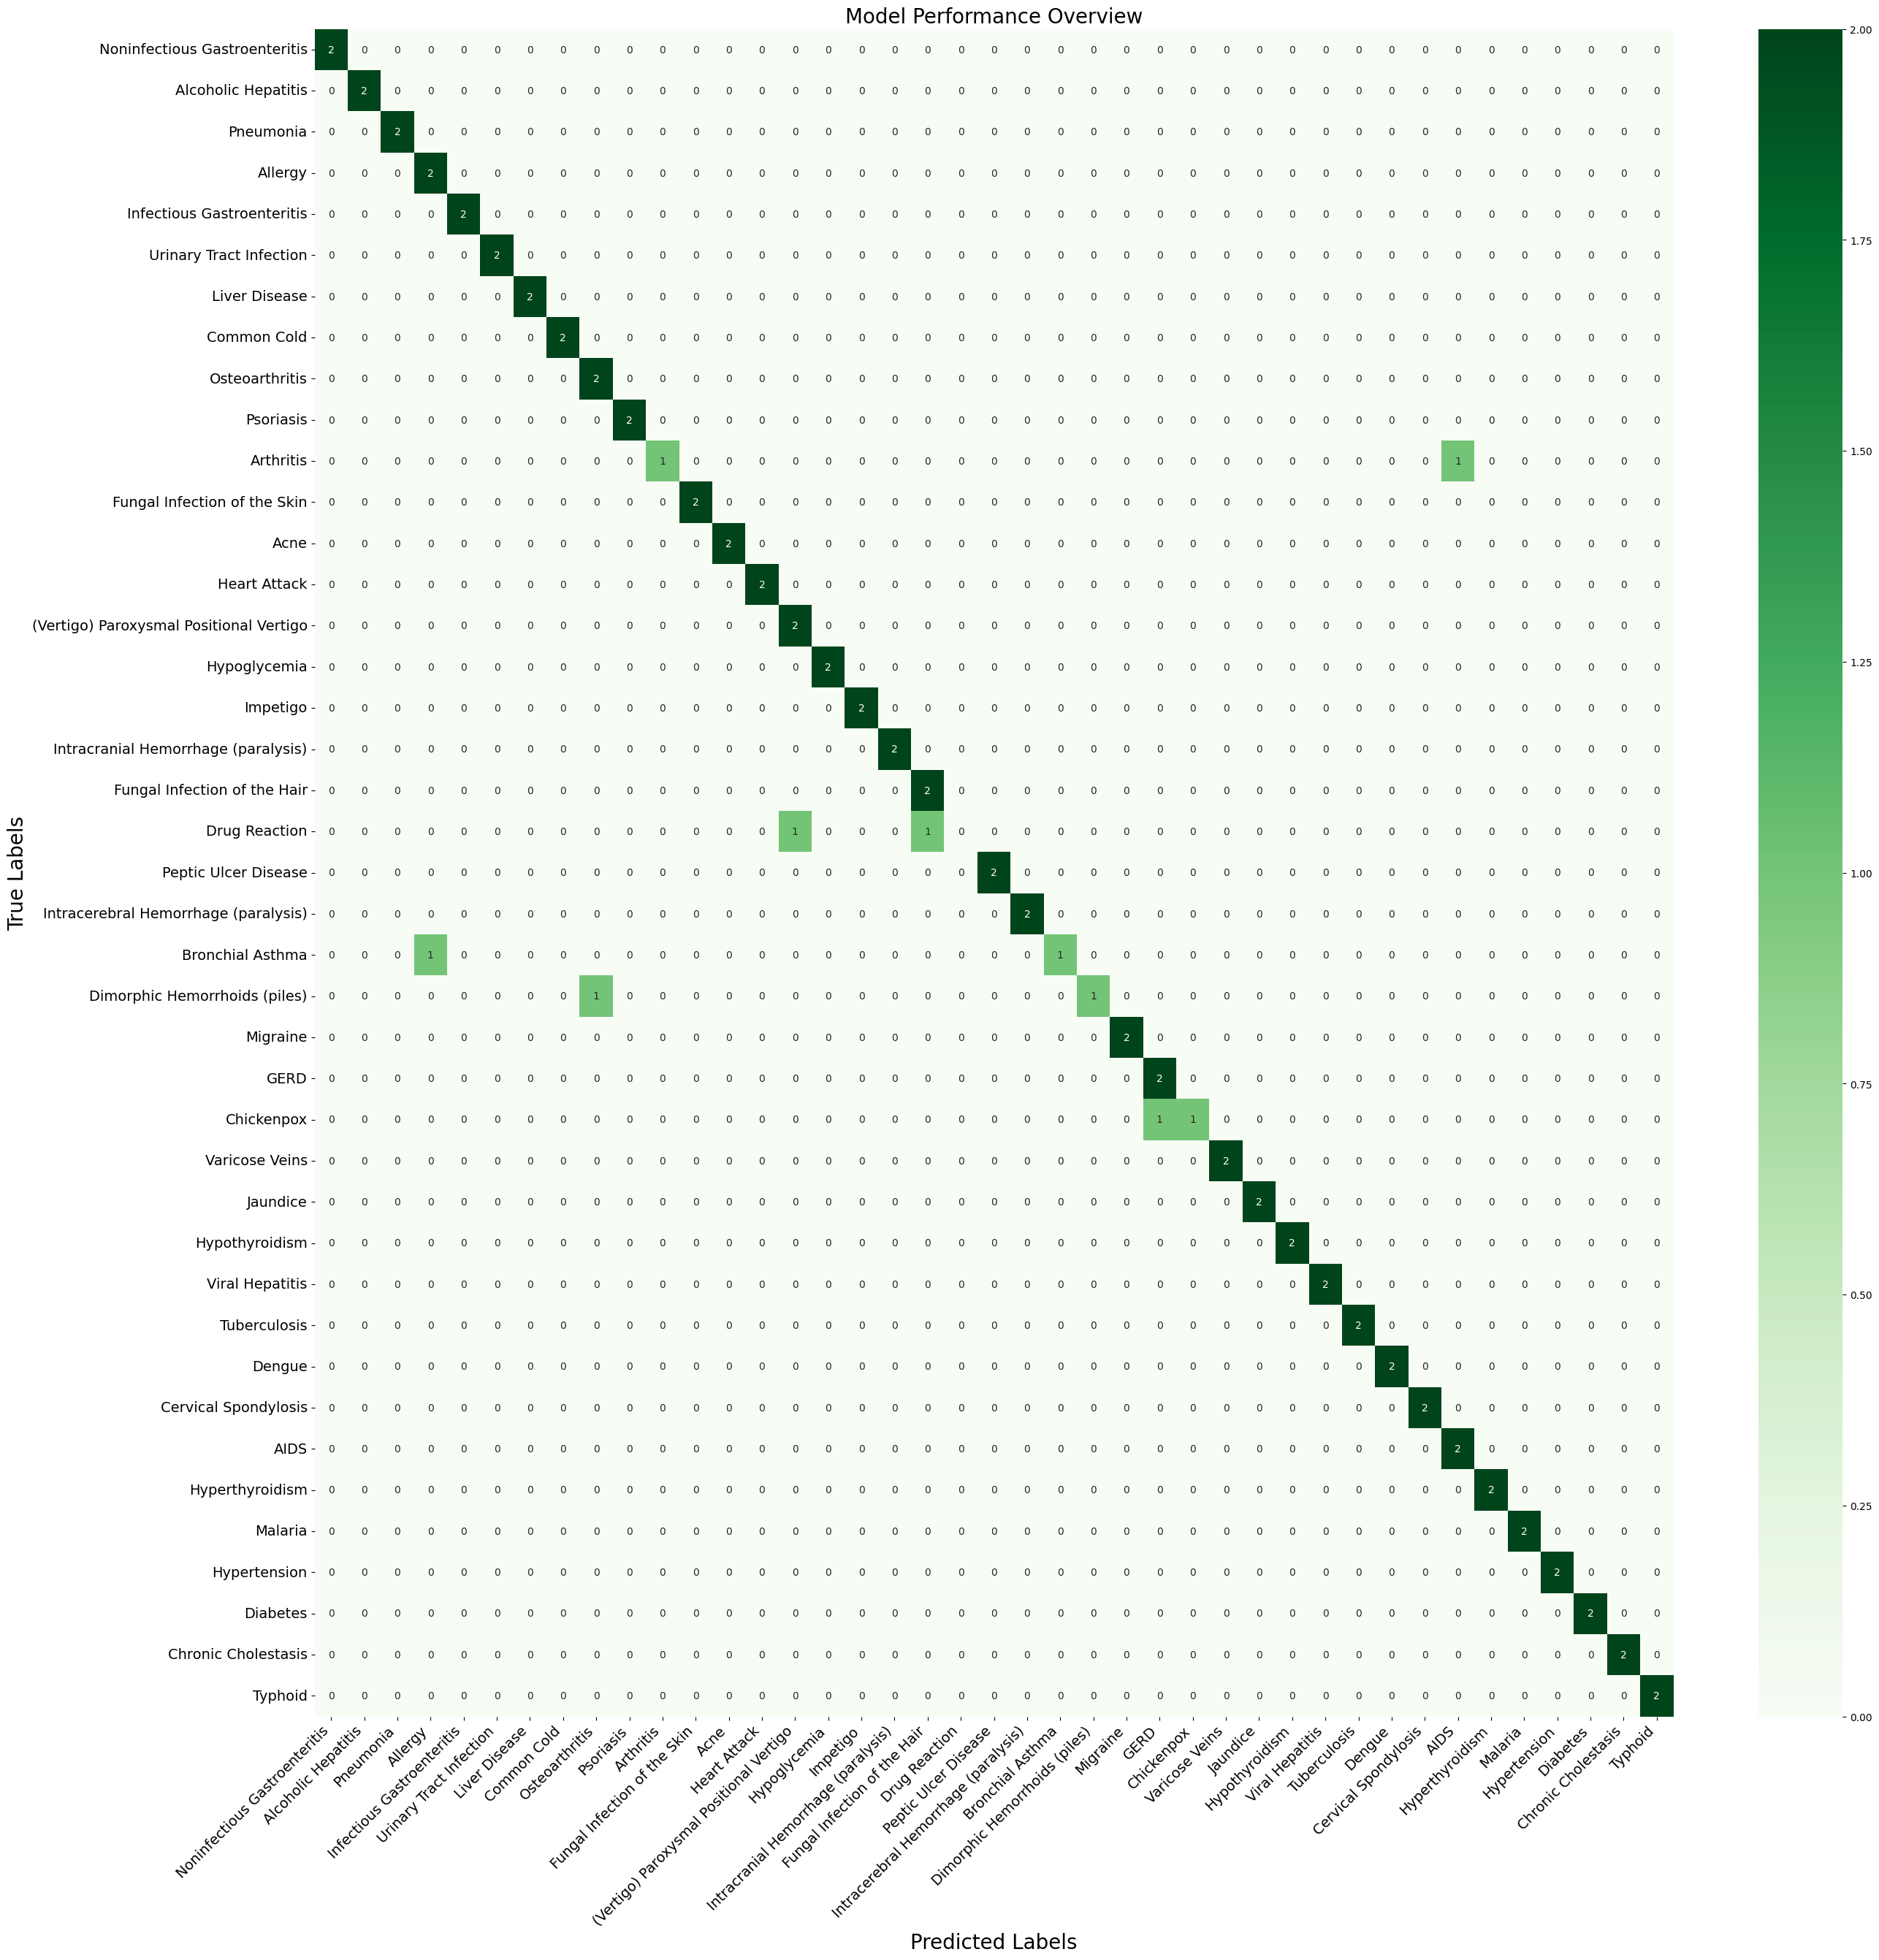

In [ ]:
# Visualize Confusion Matrix
cm=confusion_matrix(y_val,y_pred)
plt.figure(figsize=(30,30))
plt.title("Model Performance Overview",fontsize=20)
ax=sns.heatmap(cm,annot=True,fmt="d",cmap="Greens",cbar=True)
ticklabels=list(mapper.values())
ax.set_xlabel("Predicted Labels",fontsize=20)
ax.set_ylabel("True Labels",fontsize=20)
ax.set_xticklabels(ticklabels,rotation=45,ha='right',fontsize=14)
ax.set_yticklabels(ticklabels,rotation=0,ha='right',fontsize=14)
plt.show()

In [ ]:
# Read Prescription Data
description=pd.read_csv('/content/Description.csv')
precaution=pd.read_csv("/content/Precautions.csv")
diets=pd.read_csv("/content/Diets.csv")
medications=pd.read_csv("/content/Medications.csv")
doctor=pd.read_csv("/content/Doctor.csv")

In [ ]:
# Validate on Sample Input
inp_df=pd.DataFrame([[0]*len(x_val.columns)],columns=x_val.columns)
inp_df["cough"]=1
inp_df["itching_of_skin"]=1
inp_df["skin_rash"]=1
res=mapper[model.predict(inp_df)[0]]

In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
print(description[description['Disease'] == res]["Description"].to_string(index=False))

Chickenpox is a highly contagious disease caused by the varicella-zoster virus (VZV). It can cause an itchy, blister-like rash. The rash first appears on the chest, back, and face, and then spreads over the entire body, causing between 250 and 500 itchy blisters.


In [ ]:
precaution[precaution['Disease'] == res]

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
18,Chickenpox,use neem in bathing,consume neem leaves,take vaccine,avoid public places


In [ ]:
print(diets[diets['Disease'] == res]["Diet"].to_string(index=False))

['Chicken Pox Diet', 'High-Calorie Diet', 'Soft and bland foods', 'Hydration', 'Protein-rich foods']


In [ ]:
print(medications[medications['Disease'] == res]["Medications"].to_string(index=False))

['Antiviral drugs', 'Pain relievers', 'IV fluids', 'Blood transfusions', 'Platelet transfusions']


In [ ]:
doctor[doctor['Disease'] == res]

,Disease,Consulted Doctor
16,Chickenpox,General Practitioner
